## Skorch regression network examples

In [1]:
import subprocess

# Installation on Google Colab
!git clone https://github.com/jlm429/pyperch
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/pyperch')

try:
    import google.colab
    subprocess.run(['python', '-m', 'pip', 'install', 'skorch' , 'torch'])
except ImportError:
    pass

In [18]:
import numpy as np
from sklearn.datasets import make_regression
from torch import nn, optim
#from skorch import NeuralNetClassifier
from skorch import NeuralNetRegressor
from pyperch.neural.backprop_nn import BackpropModule 
import matplotlib.pyplot as plt

In [19]:
X, y = make_regression(n_samples=1000, n_features=12, n_informative=10, noise=.2)
X = X.astype(np.float32)
y = y.reshape(-1, 1).astype(np.float32)  # Reshape y to be a 2D array for compatibility with nn

##### MLPClassifier vs. MLPRegressor 

[Chapter 6](https://www.cs.cmu.edu/afs/cs.cmu.edu/user/mitchell/ftp/mlbook.html) gives a Bayesian justification for using log loss when searching for a maximum likelihood hypothesis to predict probabilities and likewise, squared error for regression.  These loss functions are automatically selected when you use scikit learn's MLPClassifier or MLPRegressor. With PyTorch, we can select these manually.  Additionally, raw outputs are needed for regression so we'll use a linear activation instead of softmax for the output layer. 

In [20]:
from skorch.callbacks import EpochScoring 

net = NeuralNetRegressor(
    module=BackpropModule,
    module__input_dim=12,
    module__output_dim=1,
    module__hidden_units=64,
    module__hidden_layers=1,
    #module__dropout_percent=0.1,
    module__activation=nn.LeakyReLU(),
    module__output_activation=lambda x: x,
    max_epochs=100,
    verbose=0,
    callbacks=[EpochScoring(scoring='neg_mean_squared_error', name='train_acc', on_train=True),],
    lr=.0001,
    iterator_train__shuffle=True,
)

In [21]:
# fit data
net.fit(X, y)

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=BackpropModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): LeakyReLU(negative_slope=0.01)
    (layers): ModuleList(
      (0): Linear(in_features=12, out_features=64, bias=True)
      (1): Linear(in_features=64, out_features=64, bias=True)
      (2): Linear(in_features=64, out_features=1, bias=True)
    )
  ),
)

## Plot learning curves

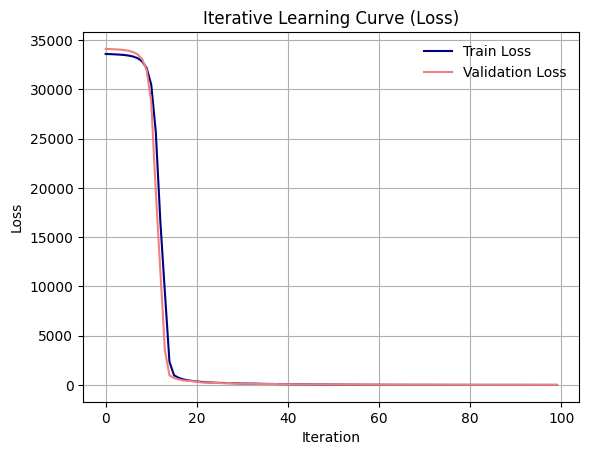

In [22]:
# plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)

#### TODO iter plot with accuracy

# RHC Regression Example

In [38]:
from skorch.callbacks import EpochScoring 
from pyperch.neural.rhc_nn import RHCModule  

net = NeuralNetRegressor(
    module=RHCModule,
    module__input_dim=12,
    module__output_dim=1,
    module__hidden_units=20,
    module__hidden_layers=1,
    module__step_size=.05,
    max_epochs=5000,
    verbose=0,
    #module__activation=nn.LeakyReLU(),
    module__output_activation=lambda x: x,
    #callbacks=[EpochScoring(scoring='accuracy', name='train_acc', on_train=True),],
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

In [39]:
RHCModule.register_rhc_training_step()

In [40]:
# fit data
net.fit(X, y)

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=RHCModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): ReLU()
    (layers): ModuleList(
      (0): Linear(in_features=12, out_features=20, bias=True)
      (1): Linear(in_features=20, out_features=20, bias=True)
      (2): Linear(in_features=20, out_features=1, bias=True)
    )
  ),
)

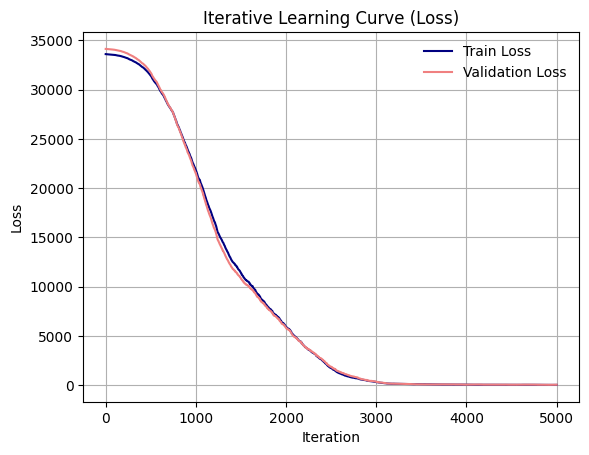

In [41]:
# plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)